# Canny Edge Detector

In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.ndimage import convolve
from math import pi, sin, cos, tan, exp, sqrt

In [2]:
dir_path = "C:/Users/gerag/Desktop/Coursera/Fisrt Principles of Computer Vision/Features and Boundaries/Edge Detection/"
im_name = "rubiks.png"

In [26]:
def plot_img(img, title):
    plt.title(title)
    plt.imshow(img,cmap='gray')
    plt.grid(False)
    plt.axis('off')
    plt.rcParams["figure.autolayout"] = True
    plt.show()

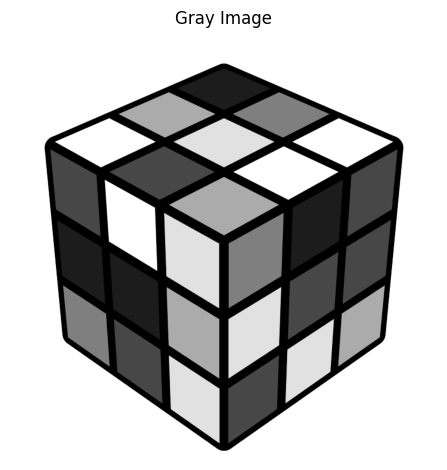

In [27]:
img_color = cv2.imread(dir_path+im_name) #Read image in grey scale
img_color = cv2.resize(img_color, (800,800), interpolation = cv2.INTER_CUBIC)
img = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plot_img(img, "Gray Image")

## Steps for Canny algorithm

#### Smooth image with 2D Gaussian filter

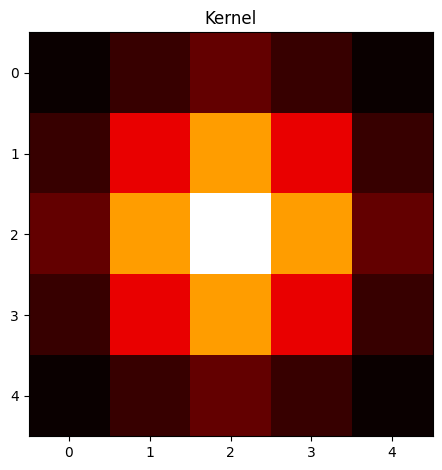

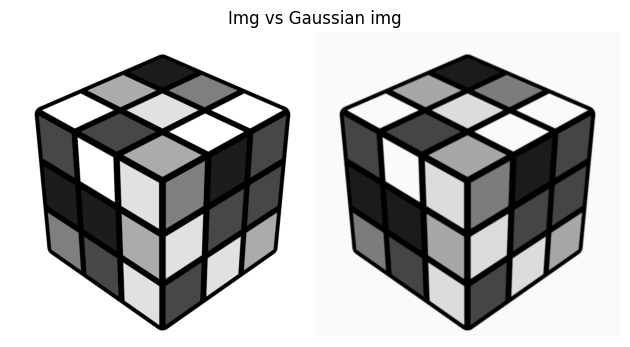

In [138]:
def Gaussian_filter(img:np.array,k:int = 3, sigma:int = 0.8) -> np.array:
    kernel = np.zeros((k,k), dtype = "float16")
    
    for i in range(-k//2 + 1,k//2 + 1):
        for j in range(-k//2 + 1,k//2 + 1):
            kernel[i+k//2][j+k//2] = 1/(2*pi*sigma**2) * exp( -1/2 * (i**2 + j**2)/sigma**2)
    
    plot_kernel = 100*kernel
    plt.imshow(plot_kernel.astype("uint8"),cmap='hot')
    plt.title("Kernel")
    plt.show()
    return convolve(img,kernel)

smooth = Gaussian_filter(img,5,1)
plot_img(np.concatenate((img,smooth),axis=1), "Img vs Gaussian img")